# Chapter 8 - Exercise Solutions - Conceptual

## 1

Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $ R_1 $, $ R_2 $ , ..., the cutpoints $ t_1 $,$ t_2 $,..., and so forth.

**Hint: Your result should look something like Figures 8.1 and 8.2.**

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

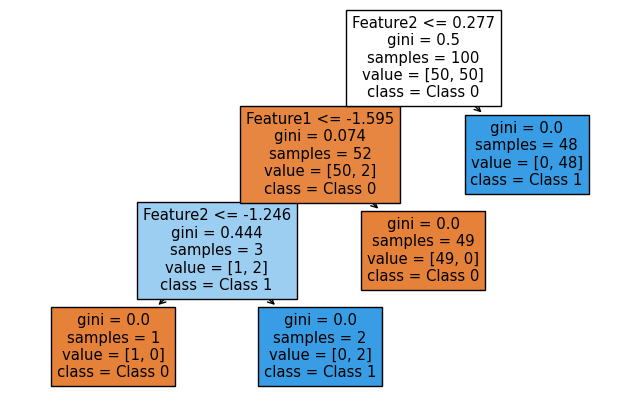

In [33]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=4)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Visualize the tree
fig, ax = subplots(figsize=(8,5))
plot_tree(clf, filled=True, feature_names=['Feature1', 'Feature2'], class_names=['Class 0', 'Class 1'], ax=ax);


In [21]:
clf.tree_.feature

array([ 1,  0,  1, -2, -2, -2, -2], dtype=int64)

In [25]:
clf.tree_.threshold

array([ 0.27700147, -1.59467739, -1.24614742, -2.        , -2.        ,
       -2.        , -2.        ])

In [26]:
lines = []
for node, feature in enumerate(clf.tree_.feature):
    if feature != -2: # node
        lines.append((feature, clf.tree_.threshold[node]))

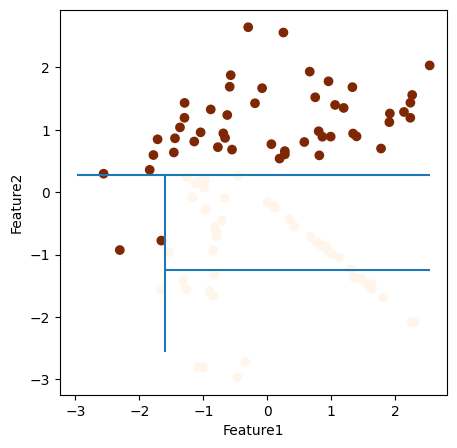

In [32]:
# Taken from github/pedvide - this only works for the p=2 case
fig, ax = subplots(1, 1, figsize=(5,5))
sc = ax.scatter(X[:,0], X[:,1], c=y, cmap='Oranges')
ax.set_ylabel('Feature2')
ax.set_xlabel('Feature1')

last_threshold = None
for feature, threshold in lines:
    if feature == 0:
        if not last_threshold:
            ax.vlines(threshold, ymin=X[:,0].min(), ymax=X[:,1].max())
        else:
            ax.vlines(threshold, ymin=X[:,0].min(), ymax=last_threshold)
    else:
        if not last_threshold:
            ax.hlines(threshold, xmin=X[:,1].min(), xmax=X[:,0].max())
        else:
            ax.hlines(threshold, xmin=last_threshold, xmax=X[:,0].max())
    last_threshold = threshold

## 2

It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model: that is, a model of the form

$$ f(X) = \sum_{j=1}^p f_j (X_j) $$

Explain why this is the case. You can begin with (8.12) in
Algorithm 8.2.

Equation (8.12) is

$$ \hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b (x) $$

The differences between this notation and the simplified depth-one boosted model notation is:

1. The depth-one model iterates over all the features $p$, rather than an arbitrary number of runs $B$. This is because when a depth-one tree is fit on the data, in the following iteration, the next fitting a depth-one tree is done on the residual of the earlier stage. This essentially guarantees that no feature $p$ will ever selected twice (at least until all features have been tried once), becuase selecting a repeated feature will not reduce the RSS (or Gini) more than selecting a different/new feature.

2. Note that $X_j$ is specified for each iteration $j$. This reiteratres the fact that for each tree-fitting iteration, a new set of data $X_j$ is used, i.e. the residual from the previous run.


## 3

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The *x*-axis should display $\hat{p}_{m1}$, ranging from 0 to 1, and the *y*-axis should display the value of the Gini index, classification error, and entropy.

Hint: In a setting with two classes, $\hat{p}_{m1} = 1 − \hat{p}_{m2}$. You could make this plot by hand, but it will be much easier to make in Python.

In [61]:
pm1 = np.linspace(0.001, 0.999, 999)
pm2 = 1 - pm1

gini = pm1 * (1 - pm1) + pm2 * (1 - pm2) # k = 1, 2
error1 = 1 - pm1 # pm1 > 0.5
error2 = 1 - pm2 # pm1 < 0.5
error = np.minimum(error1, error2)
entro = - ( pm1 * np.log(pm1) +  pm2 * np.log(pm2) ) # k = 1, 2

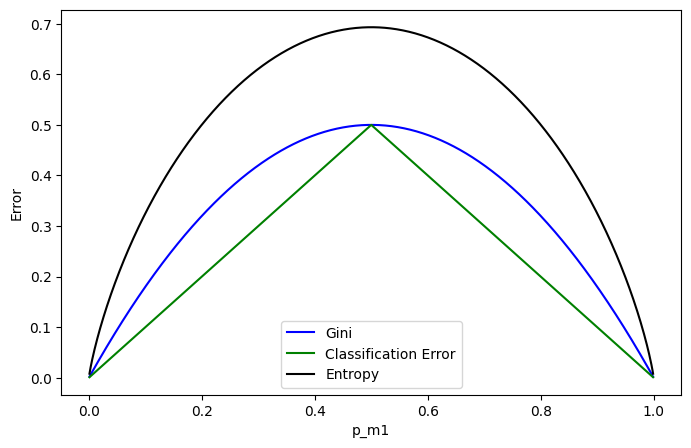

In [63]:
fig, ax = subplots(figsize=(8,5))
ax.plot(pm1, gini, c='b', label='Gini')
ax.plot(pm1, error, c='g', label='Classification Error')
ax.plot(pm1, entro, c='k', label='Entropy')
ax.set_xlabel('p_m1')
ax.set_ylabel('Error')
ax.legend();

## 4

This question relates to the plots in Figure 8.14.

**(a)** Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of Y within each region.

(See notebook)

**(b)** Create a diagram similar to the left-hand panel of Figure 8.14, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

(See notebook)

## 5

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce 10 estimates of $P$(Class is Red $|X$):

$$ 0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7, 0.75. $$

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In [68]:
data = pd.DataFrame( np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]), columns=['Prob'])
data['ProbBin'] = np.where(data['Prob'] >= 0.5, 1, 0)

In [72]:
# Majority Vote
data['ProbBin'].mean()

0.6

Majority vote: classify all regions first, then take mode of response. In this case, 6 of 10 regions are classified as "red", therefore the final classification is "red".

In [73]:
# Average Probability
data['Prob'].mean()

0.45

Average probability: simply average the probabilities of the regions in the set. In this case, the resulting average is 0.45, therefore the resulting classification is "not red".

## 6

Provide a detailed explanation of the algorithm that is used to fit a regression tree.

We have a set of $p$ predictors: $ X_1, X_2, ... X_p $, and will divide the predictor space (the set of all possible outcomes of the $Xs$) into $ J $ regions: $ R_1, R_2, ... R_J $. In each region, the mean outcome $ \hat{y}_{R_j} $ is the estimate for any observation (set of given $X$ values) falling in that region $ R_j $.

The regions in the partition space are defined by cut points, which are those that minimizes the RSS, defined as

$$ \sum_{j=1}^J \sum_{i \in R_j} \left( y_i - \hat{y}_{R_j} \right)^2 $$ 

The procedure (recursive binary splitting) is:

1. The prediction space begins as one region, so set $ \hat{y}_{R_j} = \bar{y} $.

2. For all $ X_j $ where $ j \in p $, consider all cut points $ s $ that divide the prediction space into two regions:

$$ R_1(j,s) = (X | X_j < s) \hspace{1em} \textrm{and} \hspace{1em} R_2(j,s) = (X | X_j \ge s) $$

3. Choose the $ (j, s) $ combination (one predictor $ X_j $ and one cutpoint $ s $) that minimizes the RSS summed over both regions. $ \hat{y}_{R_j} $ for each region is equal to $\bar{y}$ for the region.

4. Repeat steps 1. through 3. among the resulting regions, selecting one $ (j, s) $ pair within the *one* region that reduces the RSS the most.

5. End the algorithm when some stopping threshold is reached, such as a minimal number of nodes.